In [1]:
import networkx as nx

In [2]:
G = nx.petersen_graph()

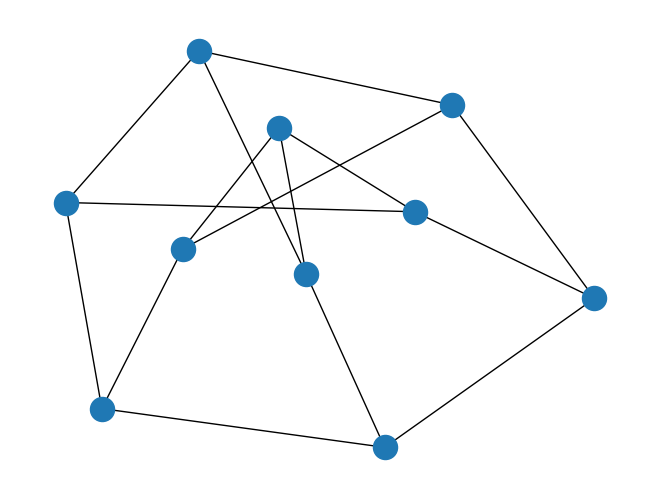

In [3]:
nx.draw(G)

In [4]:
nx.spectrum(G)

<class 'TypeError'>: 'module' object is not callable

In [5]:
dir(nx)

['AmbiguousSolution',
 'ArborescenceIterator',
 'DiGraph',
 'EdgePartition',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'LFR_benchmark_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 'SpanningTreeIterator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_dispatch',
 '_lazy_import',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_connectivity',
 'algebraicconnectivity',
 'algorithms',
 

In [6]:
spec = nx.spectral_ordering(G)

<class 'ModuleNotFoundError'>: The module 'scipy' is included in the Pyodide distribution, but it is not installed.
You can install it by calling:
  await micropip.install("scipy") in Python, or
  await pyodide.loadPackage("scipy") in JavaScript
See https://pyodide.org/en/stable/usage/loading-packages.html for more details.

In [7]:
await micropip.install("scipy")

<class 'NameError'>: name 'micropip' is not defined

In [8]:
spec = nx.spectrum(G)

<class 'TypeError'>: 'module' object is not callable

In [10]:
import pyodide_js
await pyodide_js.loadPackage('scipy')

In [12]:
spec = nx.spectrum.adjacency_spectrum(G)

In [13]:
spec

array([-2.+0.j,  1.+0.j,  3.+0.j, -2.+0.j,  1.+0.j, -2.+0.j,  1.+0.j,
        1.+0.j, -2.+0.j,  1.+0.j])

In [38]:
# Possible rows of length k^2 with exactly k 1's
def genPossibleCentralRows(k):
    rows = []
    for ls in list(itertools.combinations(range(k ** 2), k)):
        rows.append(createRowVectorFromIndexList(k, ls))
    return rows

In [16]:
int(True)

1

In [17]:
int(False)

0

In [19]:
import itertools

In [21]:
import numpy as np

In [22]:
def checkMostSinglePath(adj):
    return np.max(np.linalg.matrix_power(adj, 2)) <= 1

In [45]:
def createBaseUPPDigraph(k):
    D_adj = nx.to_numpy_array(nx.empty_graph(k ** 2))
    for i in range(k):
        D_adj[i] = createRowVectorFromIndexList(k, range(i * k, (i + 1) * k))
    return D_adj

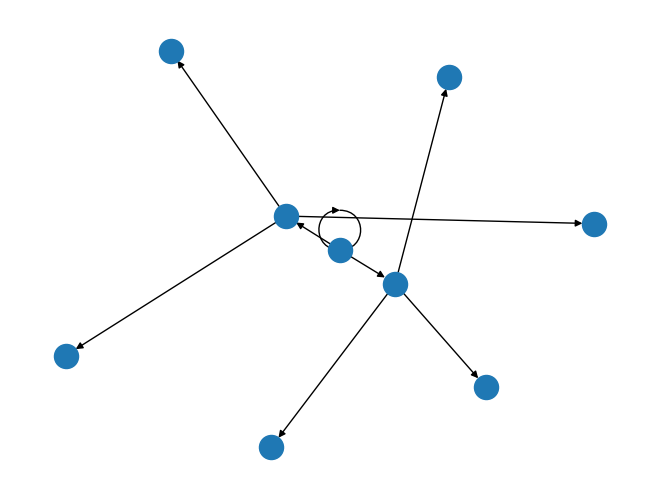

In [46]:
nx.draw(nx.DiGraph(createBaseUPPDigraph(3)))

In [39]:
# Slow, use np array instead
def createRowVectorFromIndexList(k, ls):
    row = []
    for i in range(k ** 2):
        row.append(int(i in ls))
    return row

In [47]:
Possible4Rows = genPossibleCentralRows(4)

In [ ]:
def attemptGenUPPRowByRow4(adj, i):
    if i == 16:
        print(adj)
        return adj
    else:
        for row in Possible4Rows:
            adj[i] = row
            if checkMostSinglePath(adj):
                attemptGenUPPRowByRow4(adj, i + 1)
            adj[i] = np.zeros(16)

In [ ]:
def genUPPMatrices4():
    base = createBaseUPPDigraph(4)
    UPPs = []
    UPPs.append(attemptGenUPPRowByRow4(base, 4))
    return UPPs

In [ ]:
ls = genUPPMatrices4()

In [ ]:
Possible4Rows